<a href="https://colab.research.google.com/github/AbeerProg/RRDS/blob/main/SA%20with%20t%20test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow keras scikit-learn


In [ ]:
 import pandas as pd

# Load the dataset
df = pd.read_excel('Final_dataset.xlsx')  # Make sure this is the correct file path


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21476 entries, 0 to 21475
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_text             21476 non-null  object 
 1   PM Ratio                21476 non-null  float64
 2   FPSP Ratio              21476 non-null  float64
 3   Review Length           21476 non-null  int64  
 4   RW Ratio                21476 non-null  float64
 5   Sentiment               21476 non-null  float64
 6   Generalization          21476 non-null  float64
 7   Passive Voice           21476 non-null  float64
 8   Total reviewer reviews  21476 non-null  int64  
 9   Account type            21476 non-null  int64  
 10  Useful votes            21476 non-null  int64  
 11  Attached Medias         21476 non-null  int64  
 12  Label                   21476 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 2.1+ MB
None


In [ ]:
print(df.columns)

Index(['review_text', 'PM Ratio', 'FPSP Ratio', 'Review Length', 'RW Ratio',
       'Sentiment', 'Generalization', 'Passive Voice',
       'Total reviewer reviews', 'Account type', 'Useful votes ',
       'Attached Medias', 'Label'],
      dtype='object')


In [ ]:
# Assuming text_data and numerical_data are correctly defined after loading
text_data = df['review_text']  # Replace with actual column name for text
numerical_data = df[['PM Ratio', 'FPSP Ratio', 'Review Length', 'RW Ratio',
       'Sentiment', 'Generalization', 'Passive Voice',
       'Total reviewer reviews', 'Account type', 'Useful votes ',
       'Attached Medias']]  # Replace with numerical feature columns
labels = df['Label']  # Replace with label column

# Continue with your LSTM + Dense model architecture from here


In [ ]:
pip install tensorflow keras scikit-learn


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume you have the following variables from your dataset:
# - text_data: List or array of text samples
# - numerical_data: Numpy array or DataFrame of numerical features (shape: [n_samples, 12])
# - labels: Binary labels (0 or 1)

# Tokenizing the text data
max_length = 100  # Maximum number of words per text instance
vocab_size = 10000  # Vocabulary size

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text_data)
text_sequences = tokenizer.texts_to_sequences(text_data)
text_data_padded = pad_sequences(text_sequences, maxlen=max_length)

# Scaling the numerical features
scaler = MinMaxScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Train-test split
X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    text_data_padded, numerical_data_scaled, labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, concatenate

# Text input branch (LSTM for text data)
text_input = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length)(text_input)
lstm_layer = LSTM(128)(embedding_layer)

# Numerical input branch (Dense layers for numerical data)
numerical_input = Input(shape=(11,))
dense_numerical = Dense(64, activation='relu')(numerical_input)
dense_numerical = Dense(32, activation='relu')(dense_numerical)

# Concatenating both text and numerical branches
merged = concatenate([lstm_layer, dense_numerical])

# Final output layer for classification
output = Dense(1, activation='sigmoid')(merged)

# Building and compiling the model
model = Model(inputs=[text_input, numerical_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 11)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 100, 100)       │      1,000,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │            768 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 128)            │        117,248 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │          2,080 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 160)            │              0 │ lstm_1[0][0],          │
│ (Concatenate)             │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │            161 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,120,257 (4.27 MB)

 Trainable params: 1,120,257 (4.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Check if the number of features is now 11
print(X_train_num.shape)  # This should show (n_samples, 11)


(17180, 11)


In [ ]:
# Train the model
history = model.fit(
    [X_train_text, X_train_num], y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - accuracy: 0.6935 - loss: 0.5637 - val_accuracy: 0.8335 - val_loss: 0.3598
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 122ms/step - accuracy: 0.8650 - loss: 0.3130 - val_accuracy: 0.8600 - val_loss: 0.3116
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 27s 127ms/step - accuracy: 0.9052 - loss: 0.2332 - val_accuracy: 0.8551 - val_loss: 0.3262
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - accuracy: 0.9298 - loss: 0.1817 - val_accuracy: 0.8510 - val_loss: 0.3369
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - accuracy: 0.9476 - loss: 0.1411 - val_accuracy: 0.8318 - val_loss: 0.4498
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 123ms/step - accuracy: 0.9652 - loss: 0.0975 - val_accuracy: 0.8196 - val_loss: 0.4987
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 123ms/step - accuracy: 0.9731 - loss: 0.0786 - val_accuracy: 0.8225 - val_loss: 0.5329
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - accuracy: 0.9729 - loss: 0

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Predicting on the test set
y_pred_prob = model.predict([X_test_text, X_test_num])
y_pred = np.round(y_pred_prob)  # Convert probabilities to binary predictions

# Classification report
print(classification_report(y_test, y_pred))

# AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC Score: {roc_auc}')


135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2491
           1       0.78      0.76      0.77      1805

    accuracy                           0.81      4296
   macro avg       0.81      0.81      0.81      4296
weighted avg       0.81      0.81      0.81      4296

AUC-ROC Score: 0.8961392314270432


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')

# Assuming `text_column` is the name of your text column
# Preprocessing function to clean the text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetical tokens
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply the preprocessing
df['cleaned_text'] = df['review_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Separate the text into two groups: Class 0 and Class 1
class_0_text = df[df['Label'] == 0]['cleaned_text']
class_1_text = df[df['Label'] == 1]['cleaned_text']

# Use CountVectorizer to get word counts
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features to limit vocabulary size
X_0 = vectorizer.fit_transform(class_0_text)
X_1 = vectorizer.fit_transform(class_1_text)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get the sum of word occurrences in each class
class_0_word_counts = X_0.toarray().sum(axis=0)
class_1_word_counts = X_1.toarray().sum(axis=0)

# Create a DataFrame to store word counts for each class
word_count_df = pd.DataFrame({
    'word': feature_names,
    'class_0_count': class_0_word_counts,
    'class_1_count': class_1_word_counts
})

# Sort by the most frequent words in each class
word_count_df = word_count_df.sort_values(by=['class_0_count', 'class_1_count'], ascending=False)
print(word_count_df.head(20))  # View the top 20 shared features (words)


         word  class_0_count  class_1_count
303   filling           5822             40
346      gets           3008             40
631     pizza           2631             64
756   serving           2511             35
352    giving           2124             16
582   options           1727            124
883      tips           1528             17
456     latte           1432             22
339     games           1346             54
193    crispy           1253             70
329  friendly           1250            771
572  omelette           1239             27
17     always           1197            694
803      spot           1193            263
70       beef           1189             74
127    change           1087             49
51      awful           1059             28
318    forget           1034             30
390   history           1033             21
554      nice           1003            932


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Compute TF-IDF values for both classes
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_0 = tfidf_vectorizer.fit_transform(class_0_text)
tfidf_1 = tfidf_vectorizer.fit_transform(class_1_text)

# Get feature names and sum TF-IDF scores for each class
feature_names = tfidf_vectorizer.get_feature_names_out()
class_0_tfidf_scores = tfidf_0.toarray().sum(axis=0)
class_1_tfidf_scores = tfidf_1.toarray().sum(axis=0)

# Create a DataFrame to store TF-IDF scores for each class
tfidf_df = pd.DataFrame({
    'word': feature_names,
    'class_0_tfidf': class_0_tfidf_scores,
    'class_1_tfidf': class_1_tfidf_scores
})

# Sort by the highest TF-IDF scores
tfidf_df = tfidf_df.sort_values(by=['class_0_tfidf', 'class_1_tfidf'], ascending=False)
print(tfidf_df.head(20))  # View the top 20 shared features based on TF-IDF


         word  class_0_tfidf  class_1_tfidf
303   filling     776.381882      12.062973
346      gets     548.359168      11.272824
756   serving     468.744809      11.632654
631     pizza     431.790798      19.668200
352    giving     421.236144       4.009270
70       beef     295.158319      21.103831
193    crispy     282.567556      18.583332
17     always     266.210626     191.891701
481       lol     256.414054      13.742050
883      tips     249.066102       4.189997
554      nice     240.827878     249.770142
582   options     240.803640      34.370476
803      spot     234.984637      72.242246
339     games     232.315065      20.105798
456     latte     225.709333       7.177924
390   history     218.904718       7.584020
572  omelette     205.130955       8.130844
127    change     205.121485      12.486560
329  friendly     202.219031     220.772155
316     foods     200.198018      17.557170


In [ ]:
# Create a CountVectorizer for bigrams or trigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=1000)  # Using bigrams
X_0_bigram = bigram_vectorizer.fit_transform(class_0_text)
X_1_bigram = bigram_vectorizer.fit_transform(class_1_text)

# Get bigram feature names and counts
bigram_features = bigram_vectorizer.get_feature_names_out()
class_0_bigram_counts = X_0_bigram.toarray().sum(axis=0)
class_1_bigram_counts = X_1_bigram.toarray().sum(axis=0)

# Create a DataFrame to store bigram counts for each class
bigram_df = pd.DataFrame({
    'bigram': bigram_features,
    'class_0_count': class_0_bigram_counts,
    'class_1_count': class_1_bigram_counts
})

# Sort by the most frequent bigrams
bigram_df = bigram_df.sort_values(by=['class_0_count', 'class_1_count'], ascending=False)
print(bigram_df.head(20))  # View the top 20 shared bigrams


               bigram  class_0_count  class_1_count
137      coney island            502            192
297        food fresh            450             69
483    great addition            361              8
482            got ta            341             18
156         cute cafe            339              9
414         get order            315             18
446        good fresh            251             31
265     food ambiance            249              7
299          food fun            235              9
283       food decent            202             24
470         good take            184              8
756      placed order            173             20
169    delicious also            165              9
328     food pleasant            164              8
456         good nice            160             18
390  friendly helpful            160             13
131       coffee shop            156             13
426        going back            154             46
564         

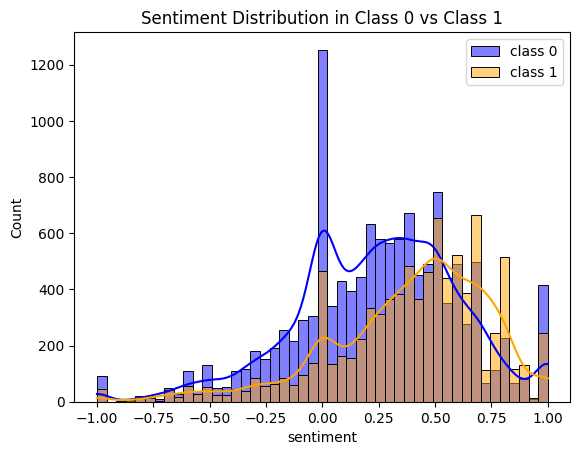

In [ ]:
from textblob import TextBlob

# Function to compute sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to both classes
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Compare sentiment distributions between the two classes
class_0_sentiment = df[df['Label'] == 0]['sentiment']
class_1_sentiment = df[df['Label'] == 1]['sentiment']

# Plot sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(class_0_sentiment, color='blue', label='class 0', kde=True)
sns.histplot(class_1_sentiment, color='orange', label='class 1', kde=True)
plt.legend()
plt.title("Sentiment Distribution in Class 0 vs Class 1")
plt.show()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# LDA for class 0
vectorizer = CountVectorizer(max_features=1000)
X_0_lda = vectorizer.fit_transform(class_0_text)

lda_0 = LatentDirichletAllocation(n_components=5, random_state=42)  # Find 5 topics
lda_0.fit(X_0_lda)

# Show the top words in each topic
for i, topic in enumerate(lda_0.components_):
    print(f"Topic {i+1}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])


Topic 1:
['good', 'food', 'long', 'dogs', 'dog', 'coney', 'island', 'fries', 'nathans', 'hot']
Topic 2:
['eat', 'people', 'get', 'good', 'dont', 'food', 'coffee', 'go', 'like', 'place']
Topic 3:
['amazing', 'best', 'friendly', 'staff', 'delicious', 'good', 'place', 'great', 'service', 'food']
Topic 4:
['one', 'dont', 'never', 'didnt', 'get', 'time', 'service', 'ordered', 'food', 'order']
Topic 5:
['menu', 'fries', 'little', 'fried', 'pancakes', 'chicken', 'breakfast', 'great', 'food', 'good']


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# LDA for class 0
vectorizer = CountVectorizer(max_features=1000)
X_1_lda = vectorizer.fit_transform(class_1_text)

lda_1 = LatentDirichletAllocation(n_components=5, random_state=42)  # Find 5 topics
lda_1.fit(X_1_lda)

# Show the top words in each topic
for i, topic in enumerate(lda_1.components_):
    print(f"Topic {i+1}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])

Topic 1:
['go', 'staff', 'order', 'good', 'bad', 'dont', 'like', 'service', 'place', 'food']
Topic 2:
['got', 'line', 'us', 'get', 'back', 'order', 'long', 'wait', 'food', 'time']
Topic 3:
['fried', 'sandwich', 'cheese', 'dog', 'dogs', 'best', 'good', 'fries', 'hot', 'chicken']
Topic 4:
['breakfast', 'pretty', 'seafood', 'food', 'coney', 'place', 'island', 'coffee', 'great', 'good']
Topic 5:
['amazing', 'nice', 'friendly', 'staff', 'delicious', 'place', 'good', 'service', 'great', 'food']


In [ ]:
pip install wordcloud matplotlib


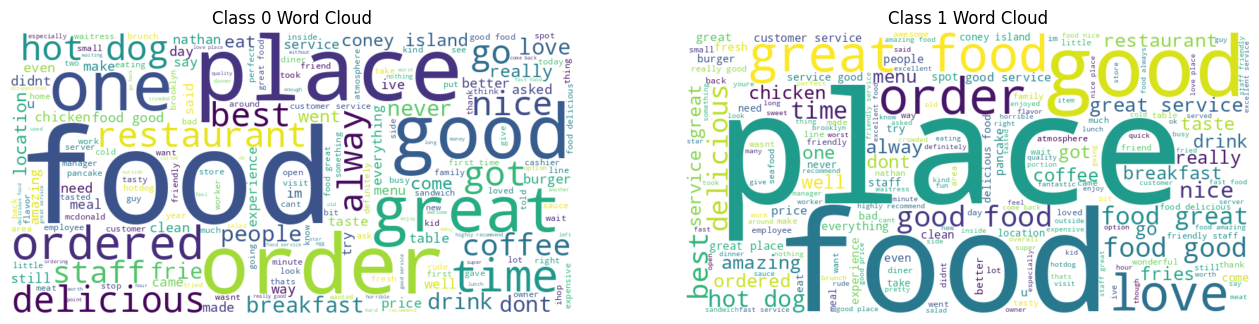

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the text from each class into a single string
class_0_text = ' '.join(df[df['Label'] == 0]['cleaned_text'])
class_1_text = ' '.join(df[df['Label'] == 1]['cleaned_text'])

# Create word clouds for each class
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(class_0_text)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(class_1_text)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title("Class 0 Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title("Class 1 Word Cloud")
plt.axis("off")

plt.show()


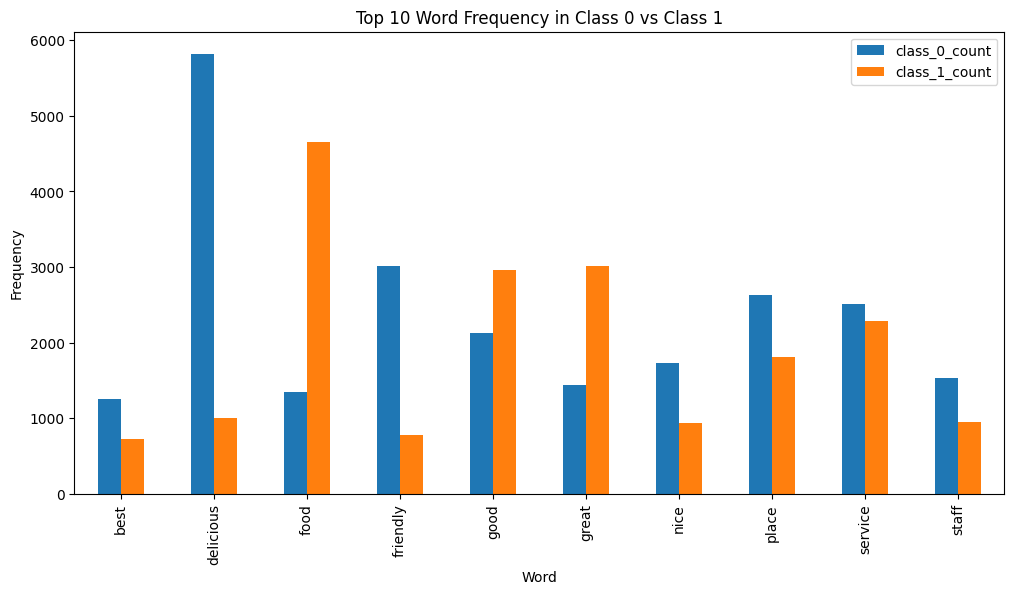

In [ ]:
import pandas as pd
import seaborn as sns

# Count vectorization to get the frequency of each word
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10)  # Adjust max_features for more words
X_0 = vectorizer.fit_transform(df[df['Label'] == 0]['cleaned_text'])
X_1 = vectorizer.fit_transform(df[df['Label'] == 1]['cleaned_text'])

# Get the word names and their counts
words = vectorizer.get_feature_names_out()
class_0_word_counts = X_0.toarray().sum(axis=0)
class_1_word_counts = X_1.toarray().sum(axis=0)

# Create a DataFrame for visualization
word_freq_df = pd.DataFrame({
    'word': words,
    'class_0_count': class_0_word_counts,
    'class_1_count': class_1_word_counts
})

# Plot a comparison of the top words in both classes
word_freq_df.plot(kind='bar', x='word', figsize=(12, 6))
plt.title("Top 10 Word Frequency in Class 0 vs Class 1")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()


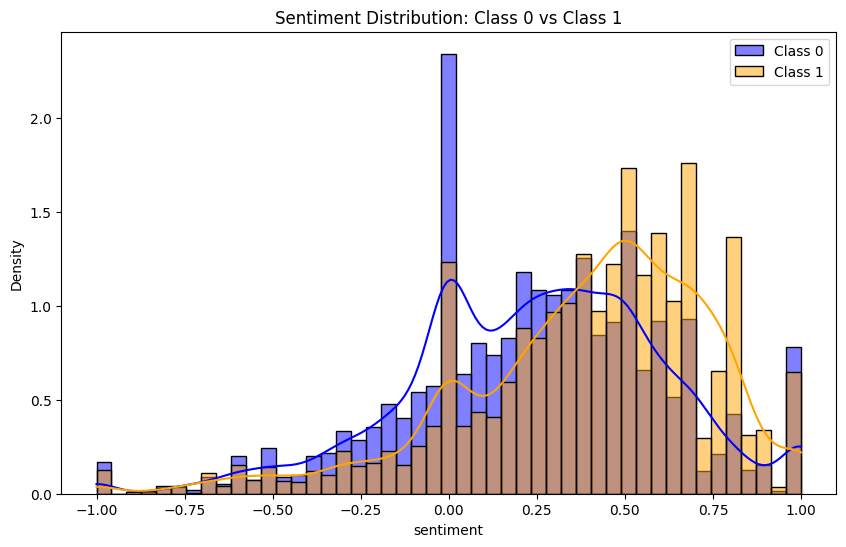

In [ ]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Compute sentiment polarity
df['sentiment'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Separate sentiment for each class
class_0_sentiment = df[df['Label'] == 0]['sentiment']
class_1_sentiment = df[df['Label'] == 1]['sentiment']

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(class_0_sentiment, color='blue', label='Class 0', kde=True, stat='density')
sns.histplot(class_1_sentiment, color='orange', label='Class 1', kde=True, stat='density')
plt.title("Sentiment Distribution: Class 0 vs Class 1")
plt.legend()
plt.show()


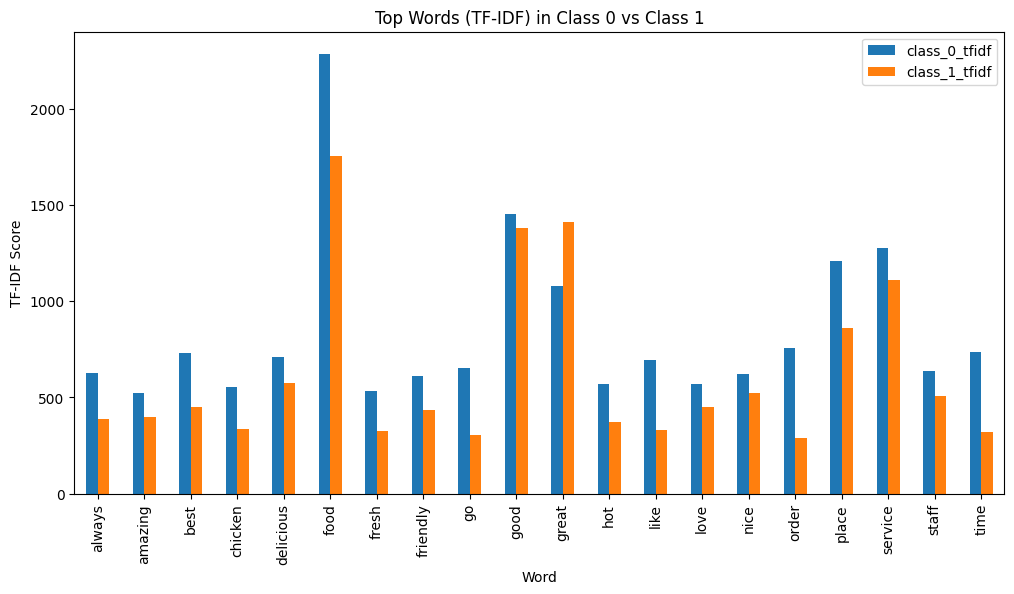

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Compute TF-IDF values for both classes
tfidf_vectorizer = TfidfVectorizer(max_features=20)  # Top 20 features
tfidf_0 = tfidf_vectorizer.fit_transform(df[df['Label'] == 0]['cleaned_text'])
tfidf_1 = tfidf_vectorizer.fit_transform(df[df['Label'] == 1]['cleaned_text'])

# Get feature names and sum TF-IDF scores for each class
features = tfidf_vectorizer.get_feature_names_out()
class_0_tfidf_scores = tfidf_0.toarray().sum(axis=0)
class_1_tfidf_scores = tfidf_1.toarray().sum(axis=0)

# Create DataFrame to visualize
tfidf_df = pd.DataFrame({
    'word': features,
    'class_0_tfidf': class_0_tfidf_scores,
    'class_1_tfidf': class_1_tfidf_scores
})

# Plot the top words for each class
tfidf_df.plot(kind='bar', x='word', figsize=(12, 6))
plt.title("Top Words (TF-IDF) in Class 0 vs Class 1")
plt.xlabel("Word")
plt.ylabel("TF-IDF Score")
plt.show()


In [ ]:
from textblob import TextBlob

# Function to compute sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the dataset
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)


In [ ]:
!pip install textstat
import textstat

# Function to compute readability score (Flesch-Kincaid)
def get_readability(text):
    return textstat.flesch_kincaid_grade(text)

# Apply readability analysis
df['readability'] = df['cleaned_text'].apply(get_readability)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.8 MB/s eta 0:00:00


In [ ]:
from collections import Counter

# Function to compute lexical diversity (unique word count / total word count)
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

# Apply lexical diversity analysis
df['lexical_diversity'] = df['cleaned_text'].apply(lexical_diversity)


In [ ]:
# Filter data for both categories
class_0 = df[df['Label'] == 0]
class_1 = df[df['Label'] == 1]


In [ ]:
pip install statsmodels


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine the classes into one dataset for the test
# Tukey’s test requires that you have a single column for the independent variable (label)
# and a single column for the dependent variable (e.g., sentiment)

# Sentiment Analysis (Test for differences in sentiment)
tukey_sentiment = pairwise_tukeyhsd(endog=df['sentiment'], groups=df['Label'], alpha=0.05)
print(tukey_sentiment)

# Readability Analysis (Test for differences in readability)
tukey_readability = pairwise_tukeyhsd(endog=df['readability'], groups=df['Label'], alpha=0.05)
print(tukey_readability)

# Lexical Structure (Test for differences in lexical diversity)
tukey_lexical = pairwise_tukeyhsd(endog=df['lexical_diversity'], groups=df['Label'], alpha=0.05)
print(tukey_lexical)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
     0      1   0.1441   0.0 0.1342 0.154   True
------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   -2.032   0.0 -2.2505 -1.8136   True
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.0056   0.0 -0.0075 -0.0037   True
---------------------------------------------------


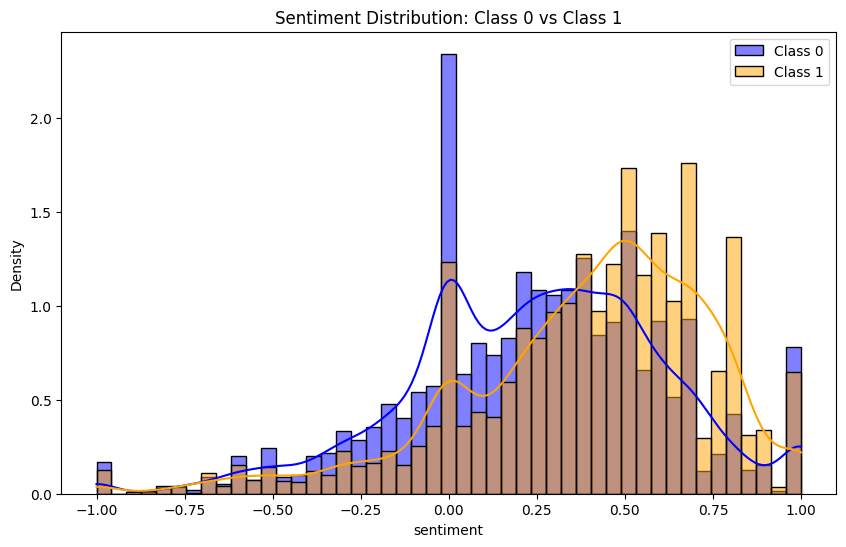

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution for both classes
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Label'] == 0]['sentiment'], color='blue', label='Class 0', kde=True, stat='density')
sns.histplot(df[df['Label'] == 1]['sentiment'], color='orange', label='Class 1', kde=True, stat='density')
plt.title("Sentiment Distribution: Class 0 vs Class 1")
plt.legend()
plt.show()


In [ ]:
from scipy.stats import levene

# Levene’s test for equal variance
levene(df[df['Label'] == 0]['sentiment'], df[df['Label'] == 1]['sentiment'])


LeveneResult(statistic=27.820179071023468, pvalue=1.344200152485736e-07)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution for both classes
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Label'] == 0]['sentiment'], color='blue', label='Class 0', kde=True, stat='density')
sns.histplot(df[df['label'] == 1]['sentiment'], color='orange', label='Class 1', kde=True, stat='density')
plt.title("Sentiment Distribution: Class 0 vs Class 1")
plt.legend()
plt.show()


In [ ]:
from scipy import stats

# Assuming you have two groups in your dataset:
group_0 = df[df['Label'] == 0]['sentiment']  # Replace 'feature' with the column you want to compare
group_1 = df[df['Label'] == 1]['sentiment']

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)

# Display the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Statistically significant difference between the two groups")
else:
    print("No statistically significant difference between the two groups")


t-statistic: -28.676408535832216
p-value: 3.690563973236548e-177
Statistically significant difference between the two groups


In [ ]:
from scipy import stats

# Assuming you have two groups in your dataset:
group_0 = df[df['Label'] == 0]['readability']  # Replace 'feature' with the column you want to compare
group_1 = df[df['Label'] == 1]['readability']

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)

# Display the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Statistically significant difference between the two groups")
else:
    print("No statistically significant difference between the two groups")


t-statistic: 18.44927427259031
p-value: 2.2463014340865723e-75
Statistically significant difference between the two groups


In [ ]:
from scipy import stats

# Assuming you have two groups in your dataset:
group_0 = df[df['Label'] == 0]['lexical_diversity']  # Replace 'feature' with the column you want to compare
group_1 = df[df['Label'] == 1]['lexical_diversity']

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)

# Display the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Statistically significant difference between the two groups")
else:
    print("No statistically significant difference between the two groups")


t-statistic: 5.698634883842212
p-value: 1.2270675056556547e-08
Statistically significant difference between the two groups


In [ ]:
import pandas as pd
from scipy import stats

# List of features to compare
features = ['sentiment', 'readability', 'lexical_diversity']  # Replace with actual feature names

# Initialize an empty list to store results
results = []

# Loop through each feature and perform Welch's t-test
for feature in features:
    group_0 = df[df['Label'] == 0][feature]  # Data for class 0
    group_1 = df[df['Label'] == 1][feature]  # Data for class 1

    # Perform Welch's t-test
    t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)

    # Calculate means and standard deviations for both groups
    mean_0 = group_0.mean()
    std_0 = group_0.std()
    mean_1 = group_1.mean()
    std_1 = group_1.std()

    # Append the results for this feature
    results.append({
        'Feature': feature,
        'Mean Class 0': mean_0,
        'Std Class 0': std_0,
        'Mean Class 1': mean_1,
        'Std Class 1': std_1,
        't-statistic': t_stat,
        'p-value': p_value
    })

# Create a DataFrame to display the results in a table
comparison_table = pd.DataFrame(results)

# Show the table
print(comparison_table)


             Feature  Mean Class 0  Std Class 0  Mean Class 1  Std Class 1  \
0          sentiment      0.243065     0.367239      0.387148     0.359428   
1        readability      9.437559     8.267303      7.405532     7.718605   
2  lexical_diversity      0.961653     0.065567      0.956050     0.074543   

   t-statistic        p-value  
0   -28.676409  3.690564e-177  
1    18.449274   2.246301e-75  
2     5.698635   1.227068e-08  
